In [27]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [28]:
#read in the data
df =pd.read_csv('StudentsTestScores.csv')

In [29]:
#to view part of the data
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


In [30]:
#to channge the column names to lower case for eas of typing column names
df.columns = [x.lower() for x in df.columns]

In [31]:
#Drop columns not needed
df.drop(['unnamed: 0'], axis = 1, inplace = True)

In [7]:
#to check variables contained in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               30641 non-null  object 
 1   ethnicgroup          28801 non-null  object 
 2   parenteduc           28796 non-null  object 
 3   lunchtype            30641 non-null  object 
 4   testprep             28811 non-null  object 
 5   parentmaritalstatus  29451 non-null  object 
 6   practicesport        30010 non-null  object 
 7   isfirstchild         29737 non-null  object 
 8   nrsiblings           29069 non-null  float64
 9   transportmeans       27507 non-null  object 
 10  wklystudyhours       29686 non-null  object 
 11  mathscore            30641 non-null  int64  
 12  readingscore         30641 non-null  int64  
 13  writingscore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [36]:
#nrsiblings has a wrong datatype
df['nrsiblings'] = df['nrsiblings'].astype(pd.Int64Dtype())
df['nrsiblings'].dtypes

Int64Dtype()

In [38]:
#To check duplicates
df.duplicated().sum()

0

In [32]:
#to only display column with missing values
missing_df = df.isnull().sum(axis = 0)
missing_df = missing_df[missing_df != 0]
missing_df

ethnicgroup            1840
parenteduc             1845
testprep               1830
parentmaritalstatus    1190
practicesport           631
isfirstchild            904
nrsiblings             1572
transportmeans         3134
wklystudyhours          955
dtype: int64

In [41]:
#To clean our data - lots of null values. we will replace the null values with random options from the unique list of values in each column
# we first clean the strin variables

df['ethnicgroup'] = df['ethnicgroup'].fillna(np.random.choice(pd.Series(['group A', 'group B', 'group C', 'group D','group E'])))
df['parenteduc'] = df['parenteduc'].fillna(np.random.choice(pd.Series(['some college', 'high school', 'associate\'s degree', 'some high school','bachelor\'s degree'])))
df['testprep'] = df['testprep'].fillna(np.random.choice(pd.Series(['none', 'completed'])))
df['parentmaritalstatus'] = df['parentmaritalstatus'].fillna(np.random.choice(pd.Series(['married', 'single', 'divorced', 'widowed' ])))
df['practicesport'] = df['practicesport'].fillna(np.random.choice(pd.Series(['sometimes', 'regularly', 'never' ])))
df['isfirstchild'] = df['isfirstchild'].fillna(np.random.choice(pd.Series(['TRUE', 'FALSE'])))
df['transportmeans'] = df['transportmeans'].fillna(np.random.choice(pd.Series(['school_bus', 'private'])))
df['wklystudyhours'] = df['wklystudyhours'].fillna(np.random.choice(pd.Series(['5-10', '< 5', '> 10'])))


df.nrsiblings = df.nrsiblings.fillna(df.nrsiblings.median())

In [42]:
#To check if we still have missing values
missing_df = df.isnull().sum(axis = 0)
missing_df = missing_df[missing_df != 0]
missing_df

Series([], dtype: int64)

In [59]:
#Lets define a function that will display the desrptive statistics for the various columns
#Given a dataFrame and the column name, this function calculates and returns two stats summary dataframes. 
# normalized value_counts of the categories in the given columns 
# sorted mean of the three test scores grouped by the categories in column  

def display_stats(df, column):
    val_cnt = df[column].value_counts().to_frame(name = column + ' (count)')
    val_cnt_norm = df[column].value_counts(normalize=True).mul(100).to_frame(name = column + ' (%)')
    
    val_cnt_table = pd.concat([val_cnt, val_cnt_norm], axis=1)
    
    mean_score_summary = df.groupby([column])[['mathscore', 'readingscore', 'writingscore']]\
    .agg(np.mean).sort_values(by='mathscore', ascending=False)
    
    return display(val_cnt_table, mean_score_summary)



In [43]:
#desciptive statistics for the scores in the 3 subjects
df[['mathscore', 'readingscore', 'writingscore']].agg([np.mean, np.std, np.max, np.min])

,mathscore,readingscore,writingscore
mean,66.558402,69.377533,68.418622
std,15.361616,14.758952,15.443525
amax,100.000000,100.000000,100.000000
amin,0.000000,10.000000,4.000000


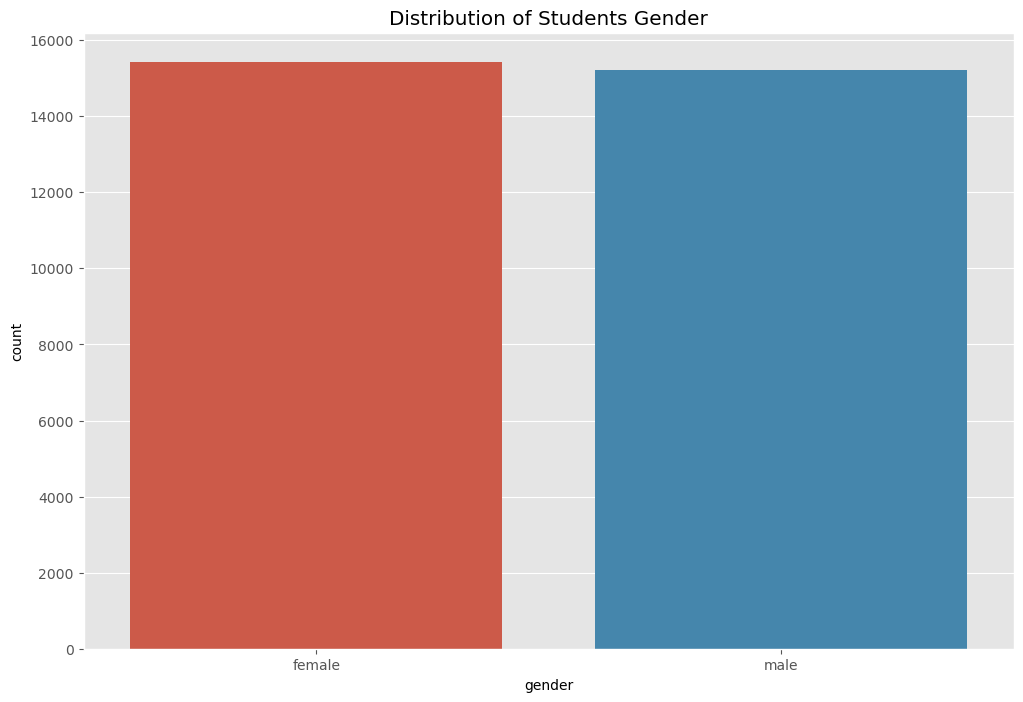

In [52]:
#Distribution of gender
sns.countplot(x = df['gender'])
plt.title('Distribution of Students Gender');

In [45]:
#To check the distribution of performance of the 3 subjects by gender 
df.groupby(['gender'])[['mathscore', 'readingscore', 'writingscore']].agg(np.mean)

,mathscore,readingscore,writingscore
gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


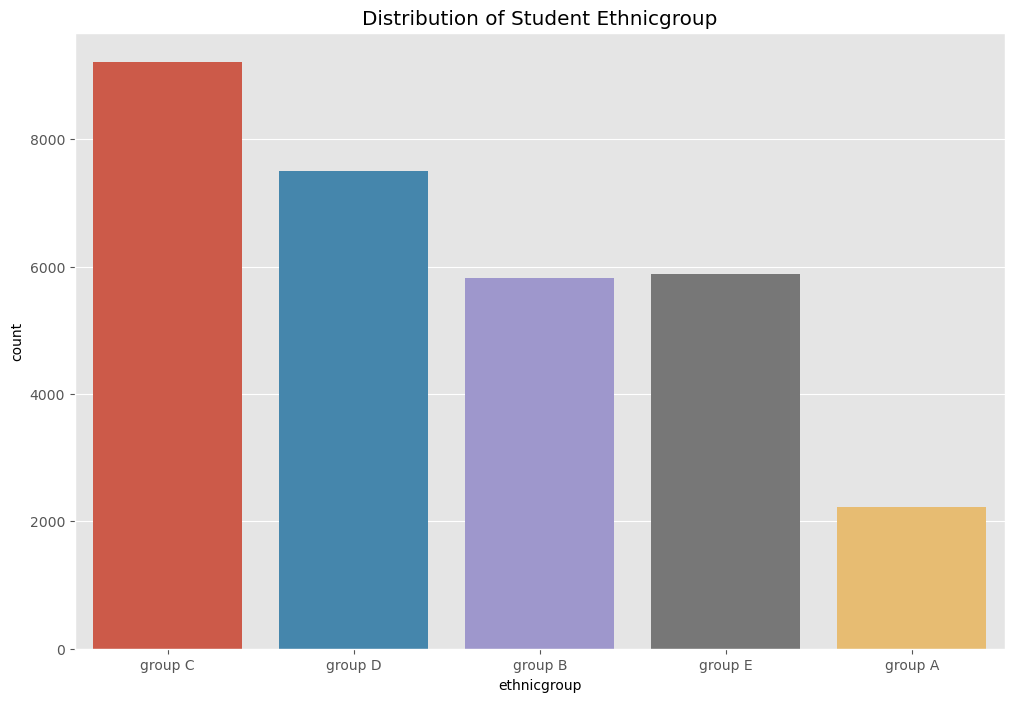

In [51]:
#Distibution of ethnicgroup

sns.countplot(x = df['ethnicgroup'],  order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Distribution of Student Ethnicgroup');

In [60]:
display_stats(df,'ethnicgroup')


,ethnicgroup (count),ethnicgroup (%)
group C,9212,30.064293
group D,7503,24.486799
group E,5881,19.193238
group B,5826,19.013740
group A,2219,7.241931


,mathscore,readingscore,writingscore
ethnicgroup,,,
group E,72.447713,72.582044,71.182622
group D,67.666400,70.382247,70.890844
group C,64.695723,68.438233,66.999240
group B,63.490216,67.320460,65.895125
group A,62.991888,66.787742,65.251915


,parenteduc (count),parenteduc (%)
some college,6633,21.647466
high school,5687,18.560099
associate's degree,5550,18.112986
some high school,5517,18.005287
bachelor's degree,5231,17.071897
master's degree,2023,6.602265


,mathscore,readingscore,writingscore
parenteduc,,,
master's degree,72.336134,75.832921,76.356896
bachelor's degree,69.118907,71.708851,71.555152
associate's degree,68.365586,71.124324,70.299099
some college,66.390472,69.179708,68.501432
high school,64.435731,67.213997,65.421136
some high school,62.584013,65.510785,63.632409


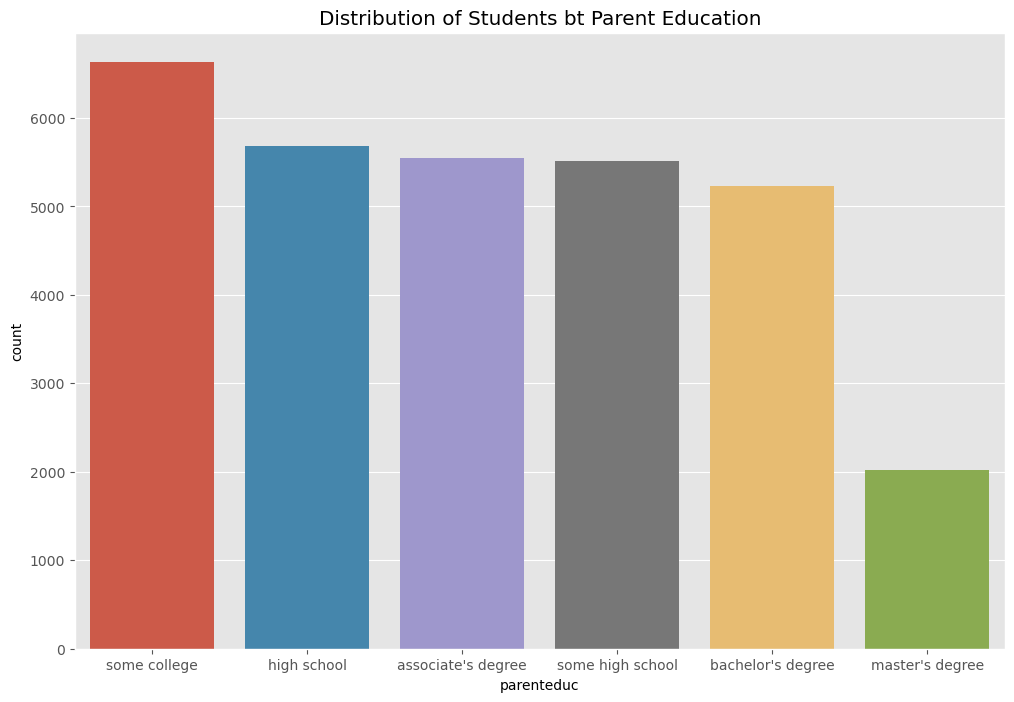

In [64]:
#To explore parent education on the score 3 subjects
sns.countplot(x = df['parenteduc'], order=['some college', 'high school', 'associate\'s degree', 'some high school', 'bachelor\'s degree', 'master\'s degree'])
plt.title('Distribution of Students bt Parent Education');
display_stats(df,'parenteduc')

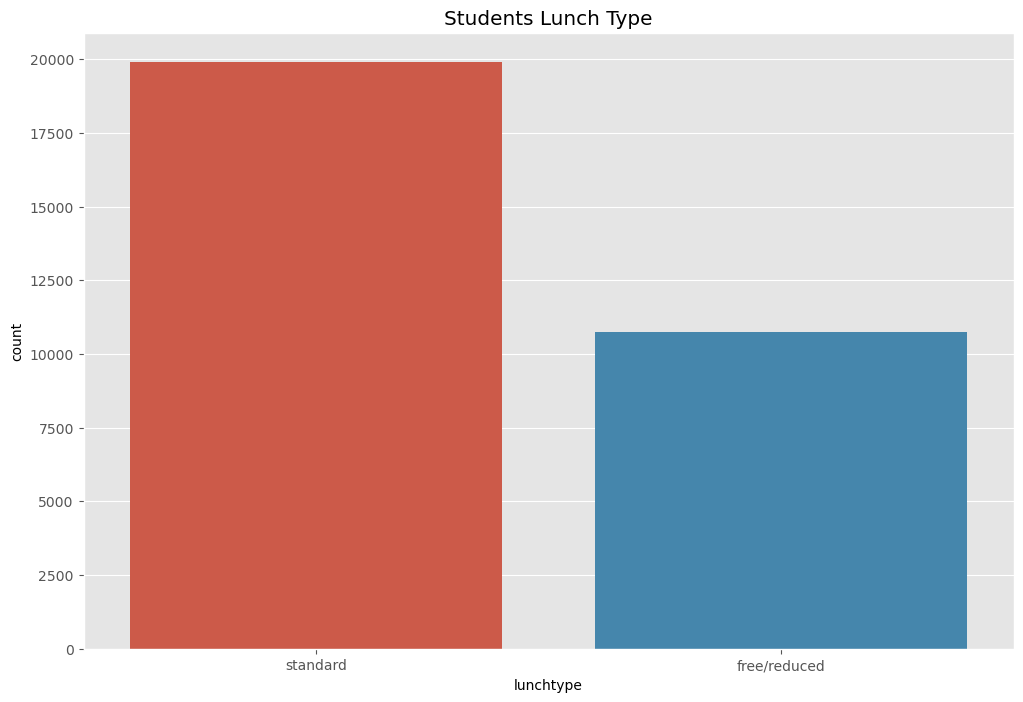

In [65]:
#Exploring Lunch Type
sns.countplot(x = df['lunchtype'])
plt.title('Students Lunch Type');

In [67]:
#To exploreLunch Type on the score 3 subjects

display_stats(df,'lunchtype')

,lunchtype (count),lunchtype (%)
standard,19905,64.961979
free/reduced,10736,35.038021


,mathscore,readingscore,writingscore
lunchtype,,,
standard,70.709370,72.175634,71.529716
free/reduced,58.862332,64.189735,62.650522


,testprep (count),testprep (%)
none,20686,67.510851
completed,9955,32.489149


,mathscore,readingscore,writingscore
testprep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


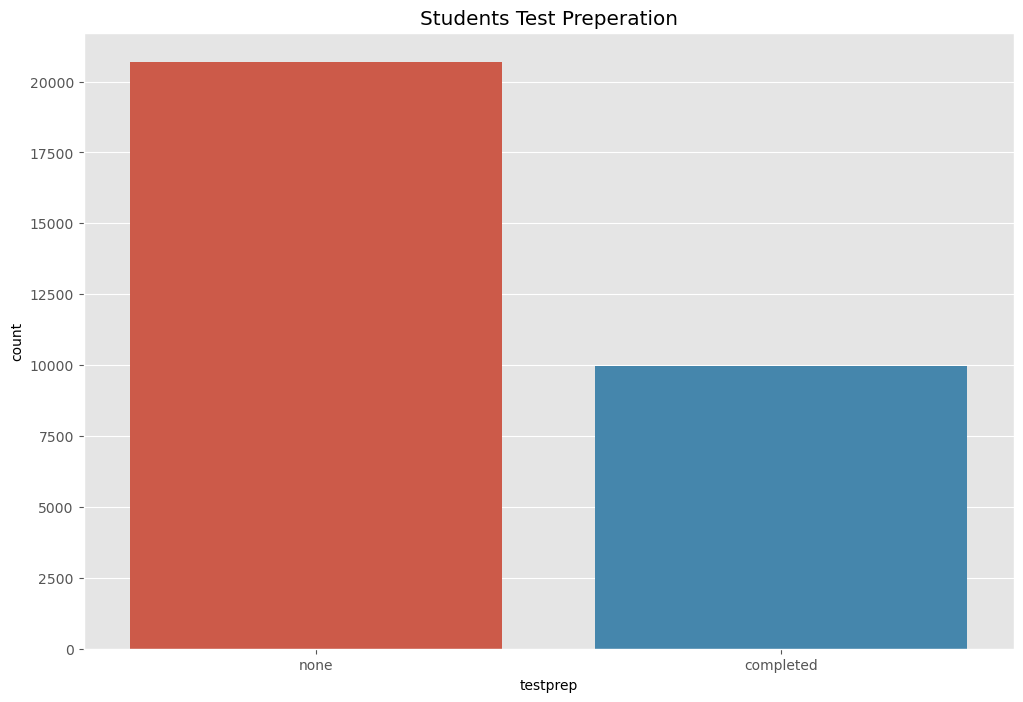

In [69]:
#To Explore testprep on the score 3 subjects
sns.countplot(x = df['testprep'])
plt.title('Students Test Preperation');
display_stats(df,'testprep')

,parentmaritalstatus (count),parentmaritalstatus (%)
married,16844,54.972096
single,7097,23.161777
divorced,4919,16.053654
widowed,1781,5.812473


,mathscore,readingscore,writingscore
parentmaritalstatus,,,
widowed,66.820887,69.375070,68.318360
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440


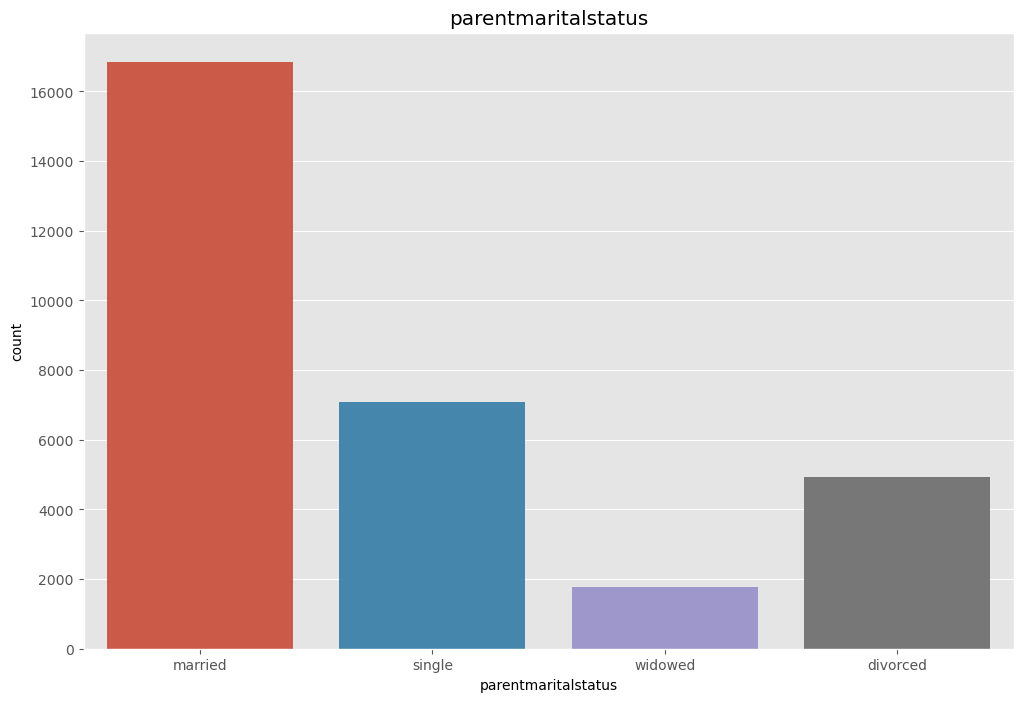

In [72]:
#To Explore parentmaritalstatus on the score 3 subjects
sns.countplot(x = df['parentmaritalstatus'])
plt.title('parentmaritalstatus');
display_stats(df,'parentmaritalstatus')

,practicesport (count),practicesport (%)
sometimes,15213,49.649163
regularly,11424,37.283378
never,4004,13.067459


,mathscore,readingscore,writingscore
practicesport,,,
regularly,67.772759,69.923407,69.544118
sometimes,66.274831,69.241307,68.072438
never,64.171079,68.337662,66.522727


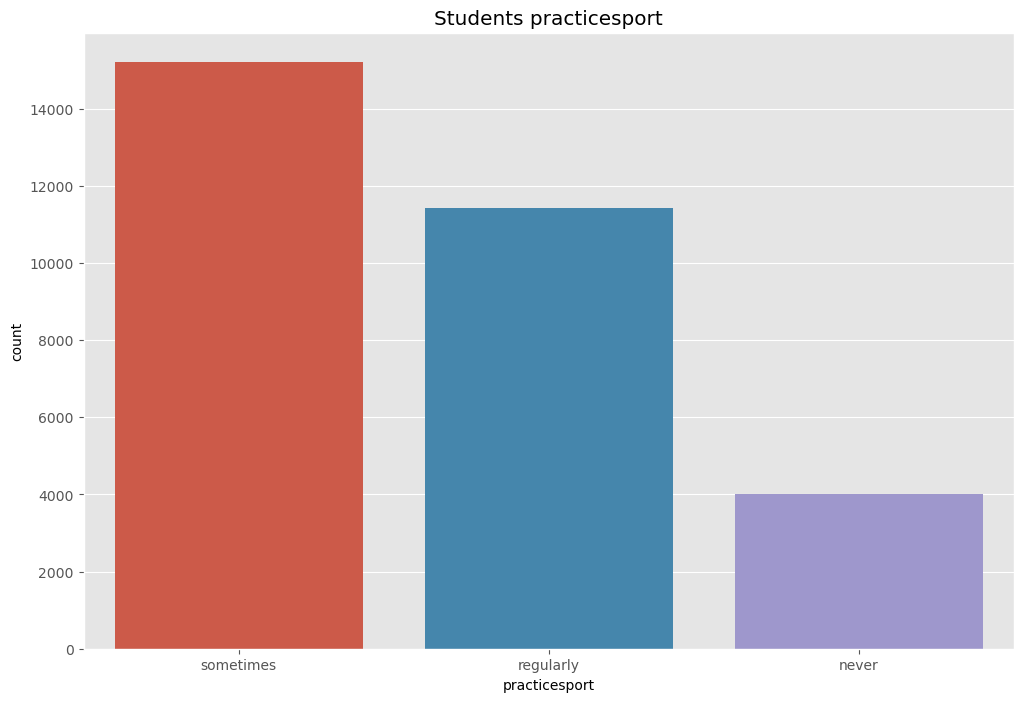

In [75]:
#To Explore practicesport on the score 3 subjects
sns.countplot(x = df['practicesport'], order = ['sometimes','regularly', 'never'])
plt.title('Students practicesport');
display_stats(df,'practicesport')

,isfirstchild (count),isfirstchild (%)
yes,19082,62.276035
no,10655,34.773669
TRUE,904,2.950295


,mathscore,readingscore,writingscore
isfirstchild,,,
yes,66.740646,69.542553,68.558484
TRUE,66.383850,68.780973,67.914823
no,66.246832,69.132614,68.210887


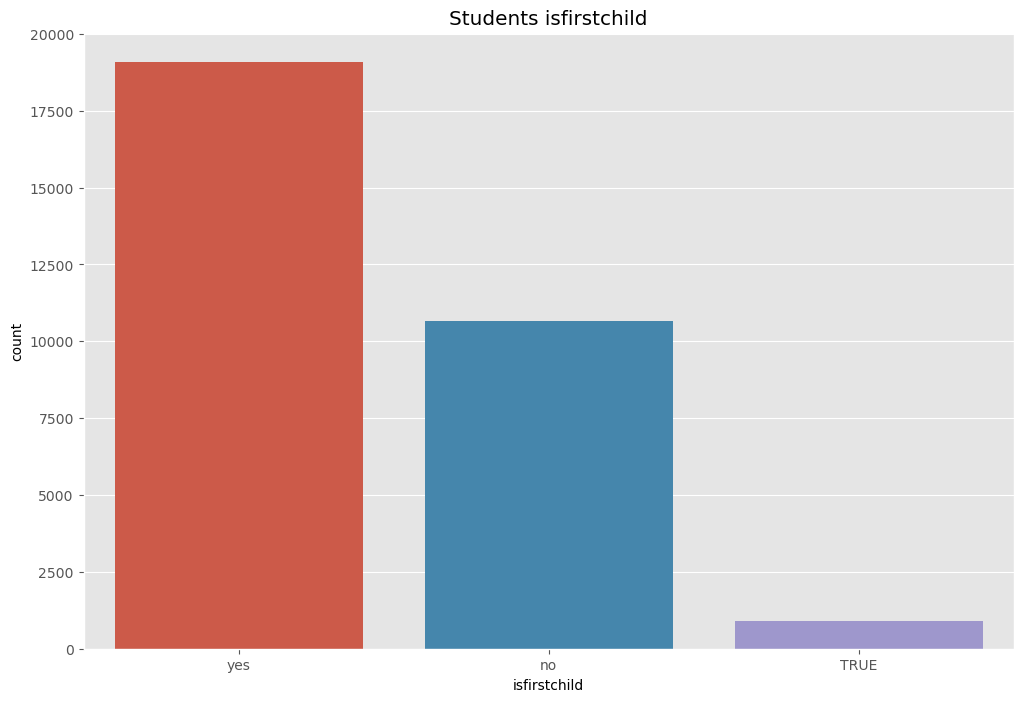

In [77]:
#To Explore isfirstchild on the score 3 subjects
sns.countplot(x = df['isfirstchild'])
plt.title('Students isfirstchild');
display_stats(df,'isfirstchild')

,nrsiblings (count),nrsiblings (%)
2,8362,27.290232
1,8217,26.81701
3,6123,19.983029
0,3085,10.068209
4,2941,9.598251
5,1320,4.307953
6,302,0.985608
7,291,0.949708


,mathscore,readingscore,writingscore
nrsiblings,,,
7,67.615120,69.828179,68.986254
0,66.819449,69.547812,68.746515
3,66.719092,69.488159,68.650498
5,66.630303,69.453788,68.282576
2,66.512557,69.425257,68.441402
1,66.473896,69.259097,68.245345
4,66.245495,69.144169,68.073444
6,65.917219,68.801325,67.860927


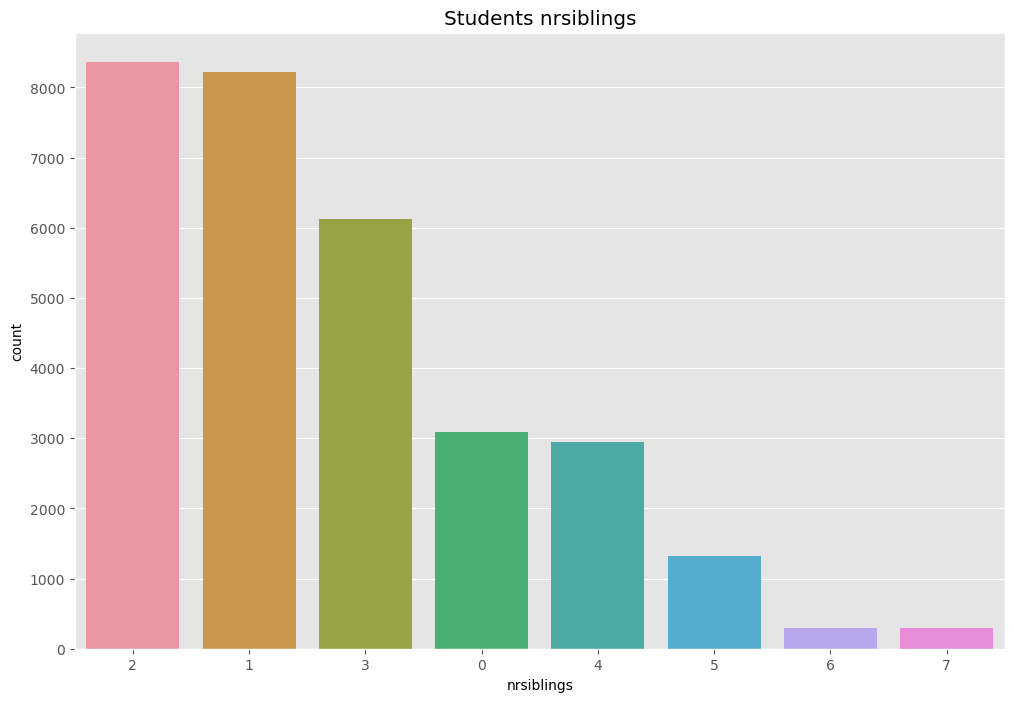

In [79]:
#To Explore nrsiblings on the score 3 subjects
sns.countplot(x = df['nrsiblings'], order = [2, 1, 3, 0, 4, 5, 6, 7])
plt.title('Students nrsiblings');
display_stats(df,'nrsiblings')

,transportmeans (count),transportmeans (%)
school_bus,16145,52.690839
private,14496,47.309161


,mathscore,readingscore,writingscore
transportmeans,,,
school_bus,66.674636,69.446206,68.492351
private,66.428946,69.301049,68.336507


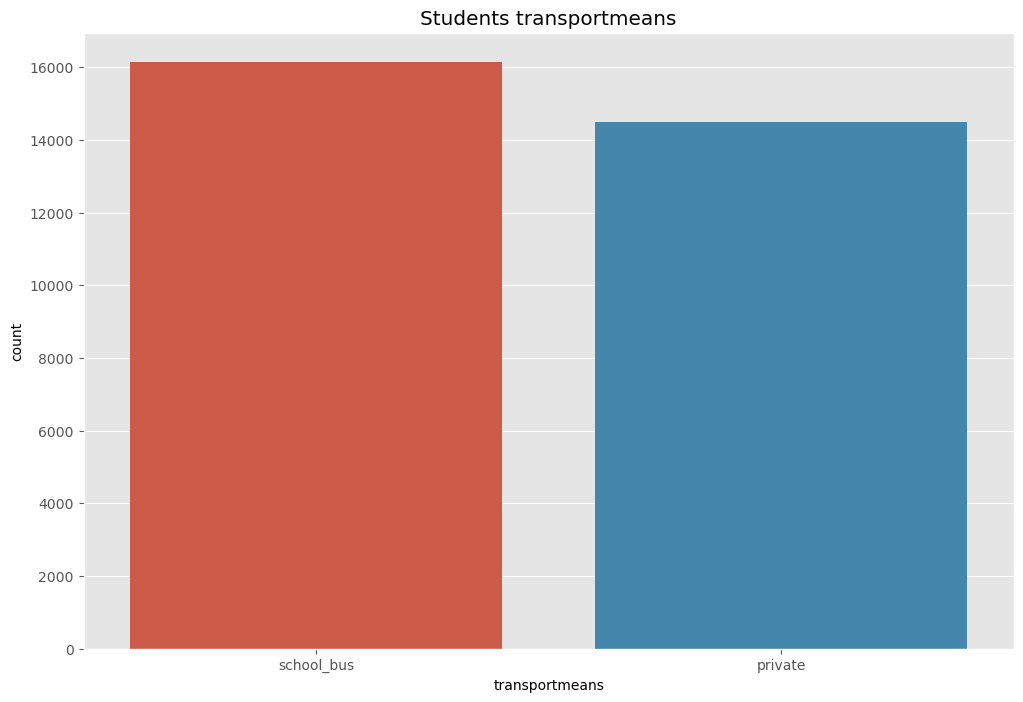

In [81]:
#To Explore transportmeans on the score 3 subjects
sns.countplot(x = df['transportmeans'])
plt.title('Students transportmeans');
display_stats(df,'transportmeans')

,wklystudyhours (count),wklystudyhours (%)
5-10,16246,53.020463
< 5,8238,26.885546
> 10,6157,20.093992


,mathscore,readingscore,writingscore
wklystudyhours,,,
> 10,68.381517,70.238265,69.621731
5-10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192


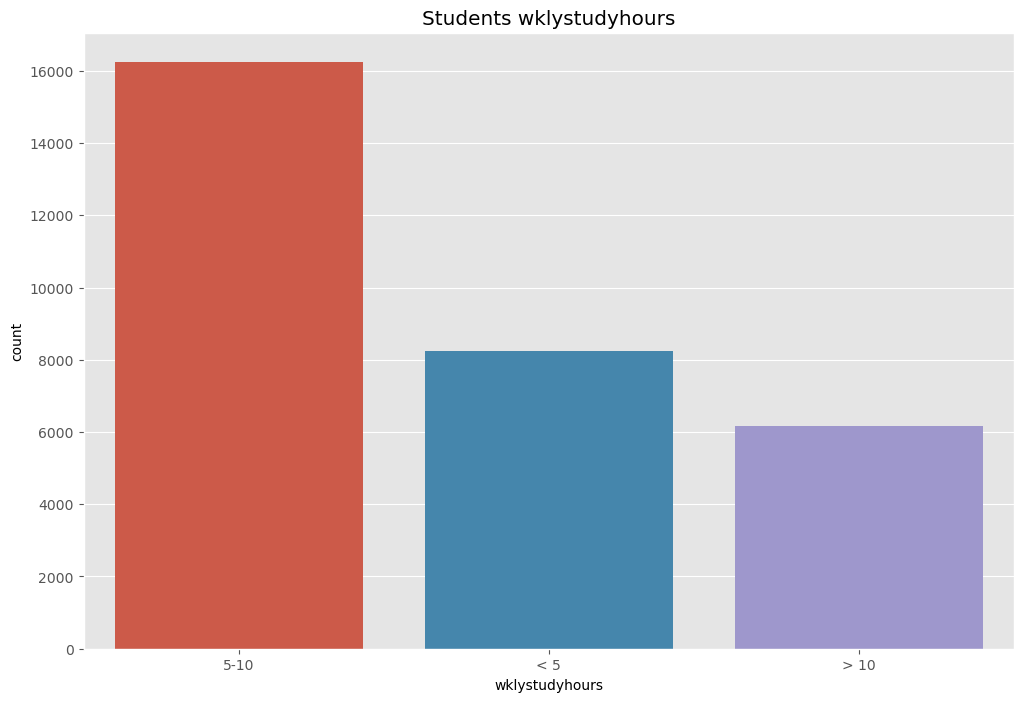

In [83]:
#To Explore wklystudyhours on the score 3 subjects
sns.countplot(x = df['wklystudyhours'], order = ['5-10', '< 5', '> 10'])
plt.title('Students wklystudyhours');
display_stats(df,'wklystudyhours')

In [84]:
#To explore performance by total Score
#we need to create a new column for total score in the 3 subject - math, readind and writing

df['totalscore'] = df.mathscore + df.readingscore + df.writingscore

In [85]:
df.head()

,gender,ethnicgroup,parenteduc,lunchtype,testprep,parentmaritalstatus,practicesport,isfirstchild,nrsiblings,transportmeans,wklystudyhours,mathscore,readingscore,writingscore,totalscore
0,female,group E,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,216
1,female,group C,some college,standard,none,married,sometimes,yes,0,private,5-10,69,90,88,247
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,271
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,private,5-10,45,56,42,143
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5-10,76,78,75,229


In [87]:
#assuming the pass mark in each subject is 50, a student will be said to have passed the exam if he/she attains a total of 150 marks in the 3 subjects. Lets create a new column to categorise the total score as pass and fail

def result(total_score):
    if(total_score > 150):
        return 'pass'
    else:
        return 'fail'

df['results'] =df.apply(lambda x: result(x['totalscore']), axis = 1 )

In [88]:
df.head()

,gender,ethnicgroup,parenteduc,lunchtype,testprep,parentmaritalstatus,practicesport,isfirstchild,nrsiblings,transportmeans,wklystudyhours,mathscore,readingscore,writingscore,totalscore,results
0,female,group E,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,216,pass
1,female,group C,some college,standard,none,married,sometimes,yes,0,private,5-10,69,90,88,247,pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,271,pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,private,5-10,45,56,42,143,fail
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5-10,76,78,75,229,pass


In [91]:
#To see the students who passed and failed
df['results'].value_counts()

pass    27240
fail     3401
Name: results, dtype: int64

Text(0.5, 1.0, 'Percentage of students Passed/Failed')

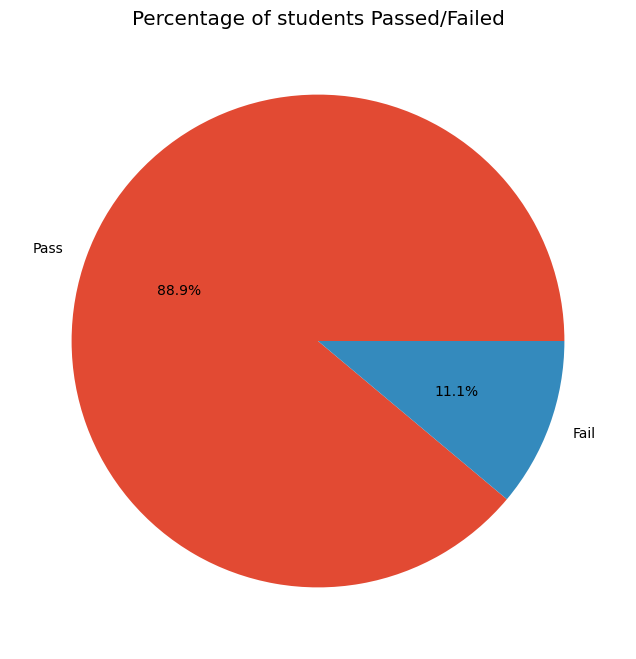

In [101]:
#pie plot of the results for te students
plt.pie(df['results'].value_counts(),labels=['Pass','Fail'],autopct='%01.1f%%')
plt.title('Percentage of students Passed/Failed')

In [94]:
def show_stats(df, column):
    val_cnt = df[column].value_counts().to_frame(name = column + ' (count)')
    val_cnt_norm = df[column].value_counts(normalize=True).mul(100).to_frame(name = column + ' (%)')
    
    val_cnt_table = pd.concat([val_cnt, val_cnt_norm], axis=1)
    
    mean_score_summary = df.groupby([column])[['totalscore']]\
    .agg(np.mean)
    
    return display(val_cnt_table, mean_score_summary)

In [95]:
show_stats(df,'gender')

,gender (count),gender (%)
female,15424,50.337783
male,15217,49.662217


,totalscore
gender,
female,209.790327
male,198.844845


In [96]:
show_stats(df,'testprep')

,testprep (count),testprep (%)
none,20686,67.510851
completed,9955,32.489149


,totalscore
testprep,
completed,217.982923
none,197.795997


In [97]:
show_stats(df,'wklystudyhours')

,wklystudyhours (count),wklystudyhours (%)
5-10,16246,53.020463
< 5,8238,26.885546
> 10,6157,20.093992


,totalscore
wklystudyhours,
5-10,205.167303
< 5,199.846686
> 10,208.241514
